In [59]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tarfile
import urllib.request 
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
#from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
#import folium
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, randint
# import ace_tools as tools

In [2]:

df = pd.read_excel('Fichier_fraude_assurance.xlsx')
df.shape

(5000, 37)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Case ID,Date_fraude_remonte,Date_sinistre,Date_souscription_contrat,Canal_Souscription,Type_Client,Tranche_Age,Genre,Code_Postal,Code_Departement,Nom_Departement,Code_Region,Nom_Region,Statut_Familial,Tranche_Revenu_Annuel,Tranche_Anciennete,Jeune_conducteur,Tranche_nombre_sinistre,Tranche_nombre_Reclamations,Monorisque,Tranche_Nombre_Produits_Souscrits,Montant_Total_Souscrit,Type_Fraude,Montant_reclame_par_client,Decision_Finale,Temps_Investigation (jours),Montant_Final_Recouvre,Incohérences_Déclarations,Réclamations_Multiples_Même_Sinistre,Réclamations_Similaires_Réseau,Tranche_Delai_entre_Souscription_sinistre,Moyens_Paiement,Historique_Paiements_En_Retard,Canal_Communication_Prefere,Participation_Campagnes_Promo,Score_Relation_Client,Risque_Geographique
0,dba7667e-a8b7-4cd4-973b-c81f53ba3d45,07/11/2017,13/05/2017,02/12/2014,En ligne,Entreprise,18-24,Femme,86170,86,Vienne,75,Nouvelle-Aquitaine,Marié(e),30 000-50 000€,3-5 ans,oui,3 sinistres,Tranche_0,Non,Entre 2 et 4,2885,Bris de glace,989,Fraude,3,1313,Non,Non,Non,Classe_2,prélèvement automatique,0,SMS,Non,Neutre,Faible
1,0772cc1f-ae4d-402a-88b9-3e66c61fedf5,24/03/2016,19/02/2016,13/11/2007,Téléphone,Particulier,45-54,Homme,13200,13,Bouches-du-Rhône,93,Provence-Alpes-Côte d'Azur,Marié(e),inf a 20 000,inf a 1 an,non,Plus de 5 sinistres,Tranche_0,Non,Entre 2 et 4,1385,Autre,298,Fraude,28,474,Oui,Oui,Non,Classe_4,prélèvement automatique,0,Email,Non,Neutre,elevé
2,d3cd422c-1496-4b3f-843b-f82ff9afd9bc,14/03/2016,22/12/2015,10/08/2011,Téléphone,Entreprise,65+,Femme,8290,8,Ardennes,44,Grand Est,Marié(e),20 000-30 000€,inf a 1 an,non,3 sinistres,Tranche_4,Non,Entre 3 et 5,2604,Circulation,437,Pas de Fraude,28,0,Non,Non,Non,Classe_3,prélèvement automatique,0,Téléphone,Non,Neutre,Moyen
3,ce25e61a-acd2-47da-adf7-b1a540106528,22/08/2016,07/07/2016,06/09/2013,En ligne,TNS,25-34,Homme,14190,14,Calvados,28,Normandie,Divorcée,30 000-50 000€,inf a 1 an,non,1 sinistre,Tranche_3,Non,Entre 2 et 4,2795,Force de la nature,665,Fraude,28,1075,Non,Non,Non,Classe_2,prélèvement automatique,0,SMS,Non,Neutre,Faible
4,63537bf7-f5b9-44e3-aa2b-e8b3a1d4b9c2,21/09/2016,25/05/2016,26/06/2010,En ligne,Entreprise,65+,Homme,2220,2,Aisne,32,Hauts-de-France,Marié(e),inf a 20 000,inf a 1 an,non,1 sinistre,Tranche_1,Non,Entre 2 et 4,2216,Force de la nature,591,Pas de Fraude,28,0,Oui,Non,Non,Classe_4,prélèvement automatique,0,SMS,Non,Neutre,Moyen


In [4]:
df.isna().sum().sum()

0

In [5]:
df.columns

Index(['Case ID', 'Date_fraude_remonte', 'Date_sinistre',
       'Date_souscription_contrat', 'Canal_Souscription', 'Type_Client',
       'Tranche_Age', 'Genre', 'Code_Postal', 'Code_Departement',
       'Nom_Departement', 'Code_Region', 'Nom_Region', 'Statut_Familial',
       'Tranche_Revenu_Annuel', 'Tranche_Anciennete', 'Jeune_conducteur',
       'Tranche_nombre_sinistre', 'Tranche_nombre_Reclamations', 'Monorisque',
       'Tranche_Nombre_Produits_Souscrits', 'Montant_Total_Souscrit',
       'Type_Fraude', 'Montant_reclame_par_client', 'Decision_Finale',
       'Temps_Investigation (jours)', 'Montant_Final_Recouvre',
       'Incohérences_Déclarations', 'Réclamations_Multiples_Même_Sinistre',
       'Réclamations_Similaires_Réseau',
       'Tranche_Delai_entre_Souscription_sinistre', 'Moyens_Paiement',
       'Historique_Paiements_En_Retard', 'Canal_Communication_Prefere',
       'Participation_Campagnes_Promo', 'Score_Relation_Client',
       'Risque_Geographique'],
      dtype='ob

In [6]:
df.select_dtypes(include=['float64', 'int64']).columns


Index(['Code_Postal', 'Code_Departement', 'Code_Region',
       'Montant_Total_Souscrit', 'Montant_reclame_par_client',
       'Temps_Investigation (jours)', 'Montant_Final_Recouvre',
       'Historique_Paiements_En_Retard'],
      dtype='object')

In [7]:
df.select_dtypes(include=['object']).columns

Index(['Case ID', 'Date_fraude_remonte', 'Date_sinistre',
       'Date_souscription_contrat', 'Canal_Souscription', 'Type_Client',
       'Tranche_Age', 'Genre', 'Nom_Departement', 'Nom_Region',
       'Statut_Familial', 'Tranche_Revenu_Annuel', 'Tranche_Anciennete',
       'Jeune_conducteur', 'Tranche_nombre_sinistre',
       'Tranche_nombre_Reclamations', 'Monorisque',
       'Tranche_Nombre_Produits_Souscrits', 'Type_Fraude', 'Decision_Finale',
       'Incohérences_Déclarations', 'Réclamations_Multiples_Même_Sinistre',
       'Réclamations_Similaires_Réseau',
       'Tranche_Delai_entre_Souscription_sinistre', 'Moyens_Paiement',
       'Canal_Communication_Prefere', 'Participation_Campagnes_Promo',
       'Score_Relation_Client', 'Risque_Geographique'],
      dtype='object')

In [8]:
key_columns_int = ['Montant_Total_Souscrit','Montant_reclame_par_client','Temps_Investigation (jours)','Montant_Final_Recouvre','Historique_Paiements_En_Retard']
df[key_columns_int].describe()

,Montant_Total_Souscrit,Montant_reclame_par_client,Temps_Investigation (jours),Montant_Final_Recouvre,Historique_Paiements_En_Retard
count,5000.0000,5000.00000,5000.000000,5000.000000,5000.000000
mean,3095.6676,1263.82080,15.285000,578.594600,0.147200
std,6662.2355,2249.26534,8.473968,1529.806941,0.569207
min,400.0000,50.00000,1.000000,0.000000,0.000000
25%,1084.0000,216.00000,8.000000,0.000000,0.000000
50%,1789.0000,377.00000,15.000000,0.000000,0.000000
75%,2473.0000,709.00000,23.000000,653.250000,0.000000
max,49999.0000,10000.00000,29.000000,10918.000000,3.000000


In [9]:
key_columns_obj = ['Canal_Souscription', 'Type_Client','Tranche_Age', 'Genre', 'Code_Postal', 'Code_Departement','Nom_Departement', 
                   'Code_Region', 'Nom_Region', 'Statut_Familial','Tranche_Revenu_Annuel', 'Tranche_Anciennete', 'Jeune_conducteur',
                   'Tranche_nombre_sinistre', 'Tranche_nombre_Reclamations', 'Monorisque','Tranche_Nombre_Produits_Souscrits', 
                   'Montant_Total_Souscrit','Type_Fraude', 'Montant_reclame_par_client', 'Decision_Finale','Temps_Investigation (jours)', 
                   'Montant_Final_Recouvre','Incohérences_Déclarations', 'Réclamations_Multiples_Même_Sinistre','Réclamations_Similaires_Réseau',
                   'Tranche_Delai_entre_Souscription_sinistre', 'Moyens_Paiement','Historique_Paiements_En_Retard', 'Canal_Communication_Prefere',
                   'Participation_Campagnes_Promo', 'Score_Relation_Client','Risque_Geographique']

for column in key_columns_obj:
    if column in df.columns:
        unique_values = df[column].unique()
        print(unique_values)

['En ligne' 'Téléphone' 'Agence']
['Entreprise' 'Particulier' 'TNS' 'Agriculteur']
['18-24' '45-54' '65+' '25-34' '55-64' '35-44']
['Femme' 'Homme' 'Non Binaire']
[86170 13200  8290 14190  2220  2600  2160 14210  6710 61200 61190 48190
 81700  1480 14400 13129 70000 11220  1360  6220  6450 87240 70110 48100
  8430 48130  2650 11270 87160 11230  2820 11140 13400 61130 48800 48200
 70500  2380 14930 11380 81170 81120  2270  6430 11400  6140  8230 13280
 11160  2870 11340  6230 48310  1370  6750 87700 14270 14310 61160 13123
 81330 61250  8090  8600  8130 70130 61230 81240  2850  2130  6270 13104
 48170  1100 81800 81600  6470 70400 11700 87120 81990]
[86 13  8 14  2  6 61 48 81  1 70 11 87]
['Vienne' 'Bouches-du-Rhône' 'Ardennes' 'Calvados' 'Aisne'
 'Alpes-Maritimes' 'Orne' 'Lozère' 'Tarn' 'Ain' 'Haute-Saône' 'Aude'
 'Haute-Vienne']
[75 93 44 28 32 76 84 27]
['Nouvelle-Aquitaine' "Provence-Alpes-Côte d'Azur" 'Grand Est' 'Normandie'
 'Hauts-de-France' 'Occitanie' 'Auvergne-Rhône-Alpes'
 '

In [10]:
df['Decision_Finale'].value_counts()

Pas de Fraude    3320
Fraude           1680
Name: Decision_Finale, dtype: int64

## GRAPHIQUES

In [11]:
## Enleve les dates et les ID
df_graphiques = df.drop(columns=['Case ID', 'Date_fraude_remonte', 'Date_sinistre','Date_souscription_contrat','Code_Postal', 
                                 'Code_Departement','Nom_Departement', 'Code_Region', 'Nom_Region'])

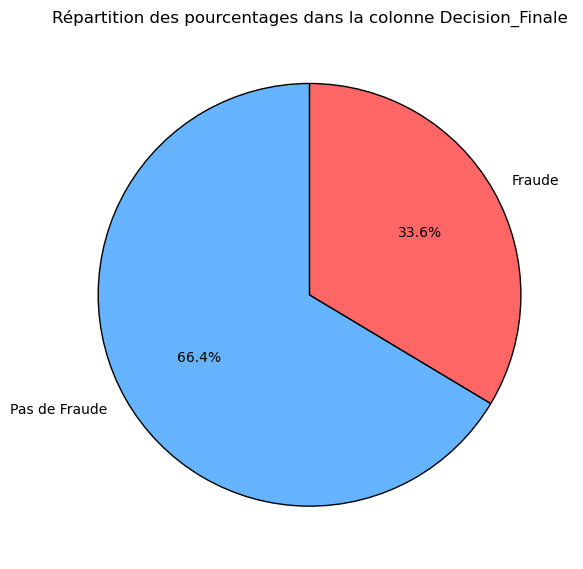

In [12]:
decision_counts = df_graphiques['Decision_Finale'].value_counts(normalize=True) * 100

# Tracer un graphique en camembert (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(decision_counts, labels=decision_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff6666'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Répartition des pourcentages dans la colonne Decision_Finale')
plt.tight_layout()
plt.show()

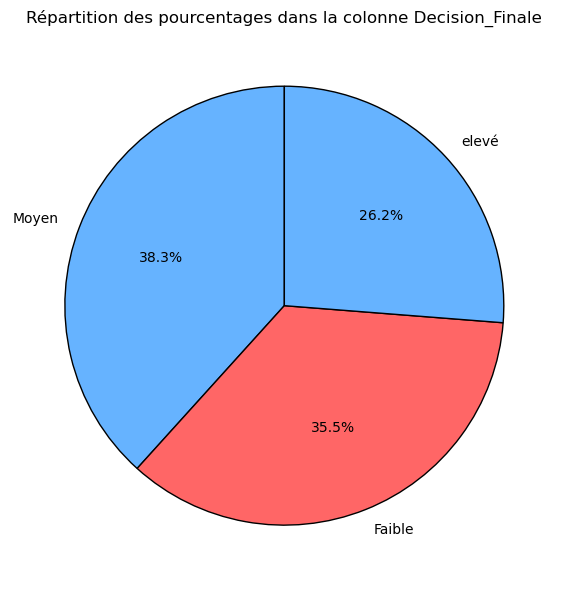

In [13]:
decision_counts = df_graphiques['Risque_Geographique'].value_counts(normalize=True) * 100

# Tracer un graphique en camembert (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(decision_counts, labels=decision_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff6666'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Répartition des pourcentages dans la colonne Decision_Finale')
plt.tight_layout()
plt.show()

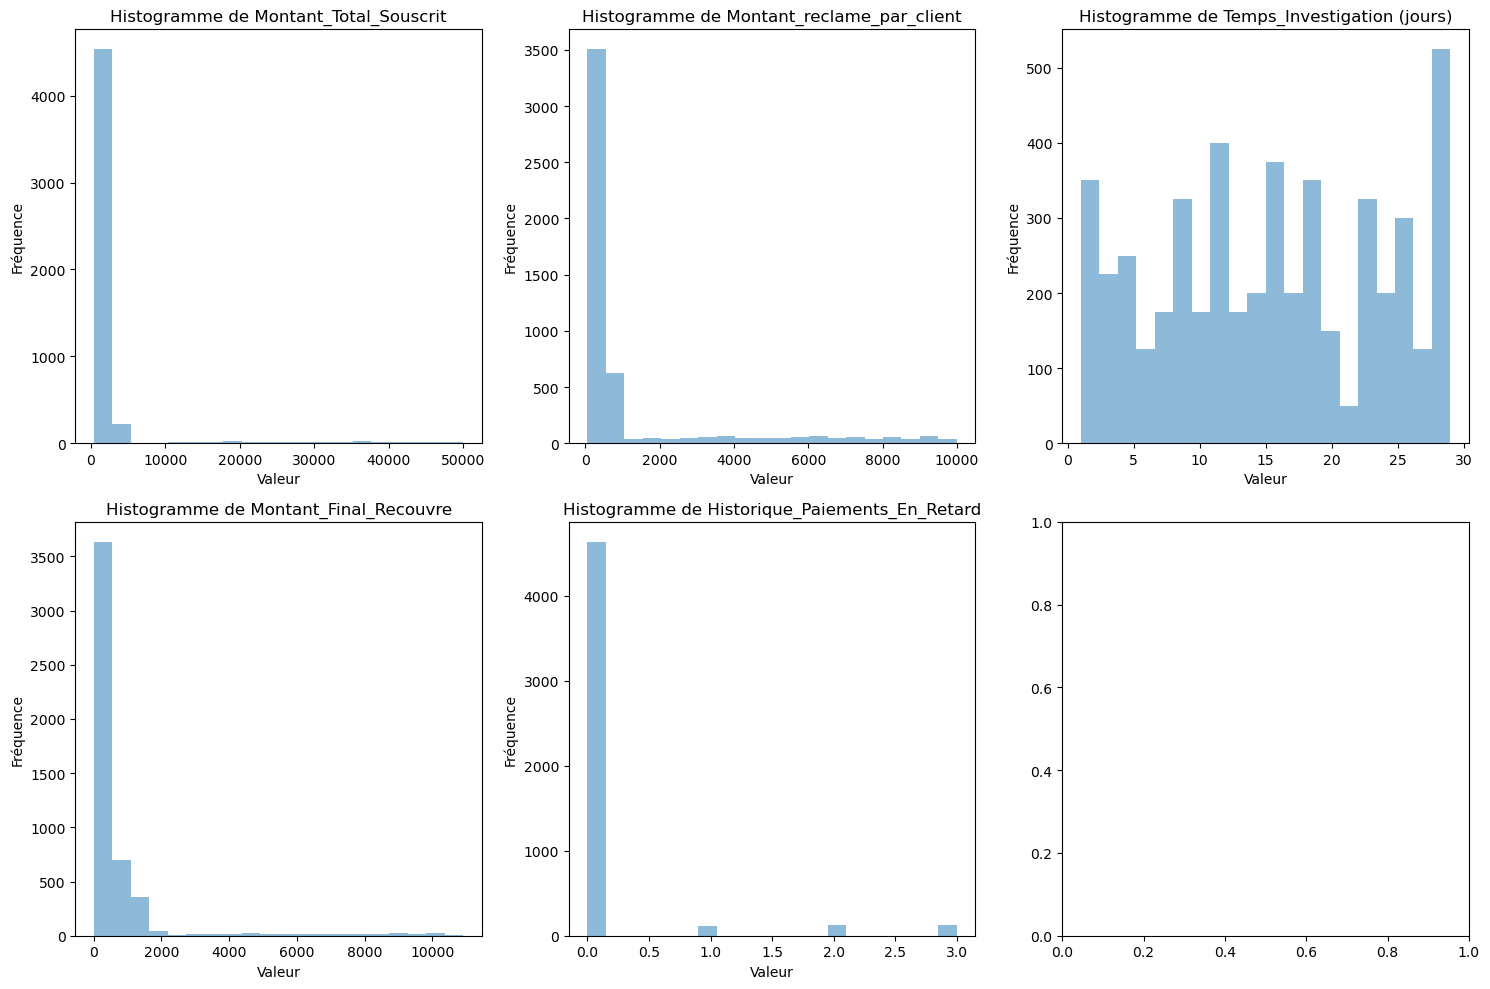

In [14]:
# Variables numériques
numeric_columns = df_graphiques.select_dtypes(include=['float64', 'int64']).columns

# Nombre de boîtes à afficher par ligne
graphique_par_ligne = 3

# Calculer le nombre total de lignes
nombre_de_lignes = -(-len(numeric_columns) // graphique_par_ligne)  # Plafond de la division pour s'assurer d'obtenir un nombre entier de lignes

# Créer une disposition de sous-graphiques
fig, axs = plt.subplots(nombre_de_lignes, graphique_par_ligne, figsize=(15, 5 * nombre_de_lignes))

# Tracé des histogrammes pour les variables numériques
for i, column in enumerate(numeric_columns):
    ligne = i // graphique_par_ligne
    colonne = i % graphique_par_ligne
    axs[ligne, colonne].hist(df_graphiques[column], bins=20, alpha=0.5)
    axs[ligne, colonne].set_xlabel('Valeur')
    axs[ligne, colonne].set_ylabel('Fréquence')
    axs[ligne, colonne].set_title('Histogramme de {}'.format(column))

# Réglages de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


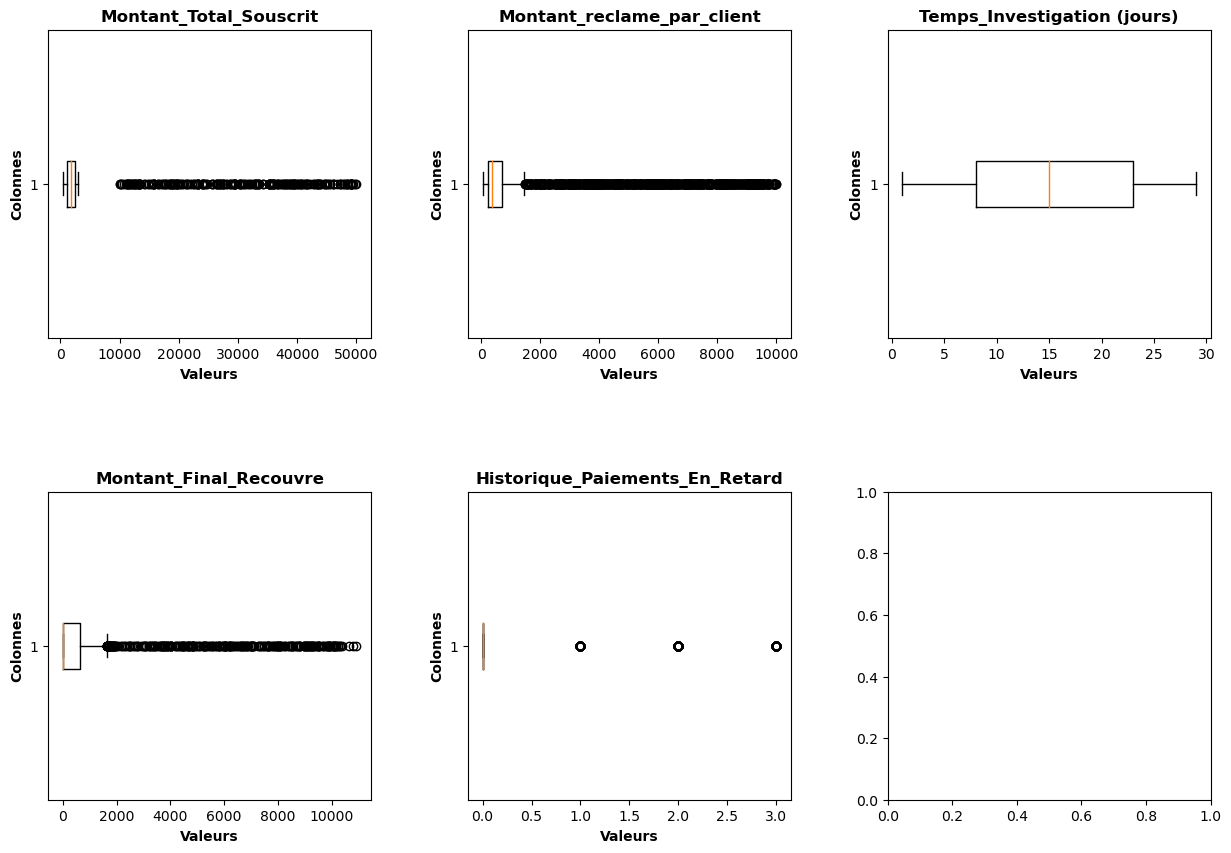

In [15]:
# Convertir les données de la DataFrame en types numériques
df_new_numerique = df_graphiques.select_dtypes(include=['float64', 'int64'])

# Nombre de boîtes à afficher par ligne
boites_par_ligne = 3

# Calculer le nombre total de lignes
nombre_de_lignes = -(-len(df_new_numerique.columns) // boites_par_ligne)  # Plafond de la division pour s'assurer d'obtenir un nombre entier de lignes

# Créer une disposition de sous-graphiques
fig, axs = plt.subplots(nombre_de_lignes, boites_par_ligne, figsize=(15, 5 * nombre_de_lignes))

# Boucle sur chaque colonne de la DataFrame
for i, nom_colonne in enumerate(df_new_numerique.columns):
    # Calculer les indices de sous-graphiques pour cette colonne
    ligne = i // boites_par_ligne
    colonne = i % boites_par_ligne
    
    # Créer une boîte à moustaches pour chaque colonne
    axs[ligne, colonne].boxplot(df_new_numerique[nom_colonne], vert=False)
    axs[ligne, colonne].set_title(nom_colonne, fontweight='bold', fontsize=12)
    
    # Ajouter les labels des axes
    axs[ligne, colonne].set_xlabel('Valeurs', fontweight='bold')
    axs[ligne, colonne].set_ylabel('Colonnes', fontweight='bold')

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Afficher les boîtes à moustaches
plt.show()

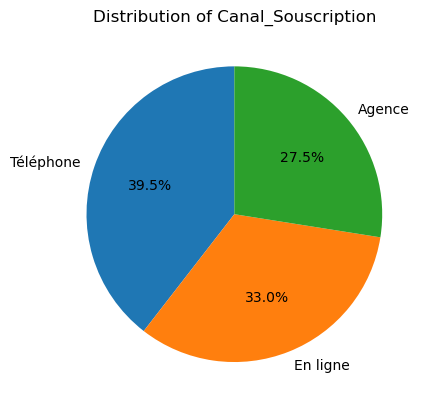

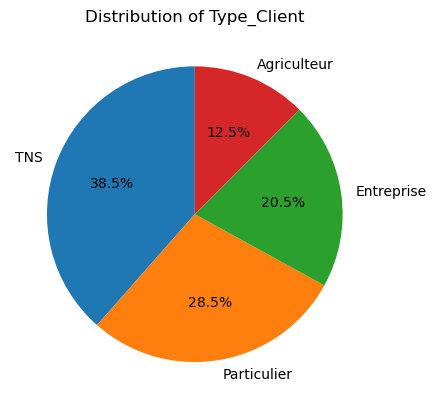

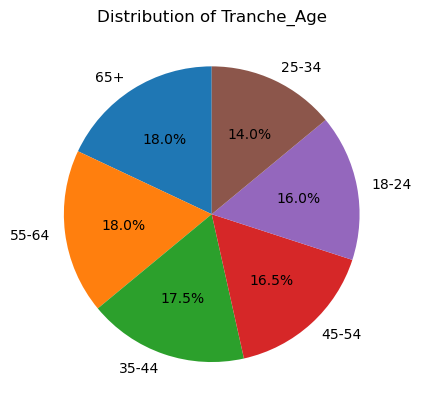

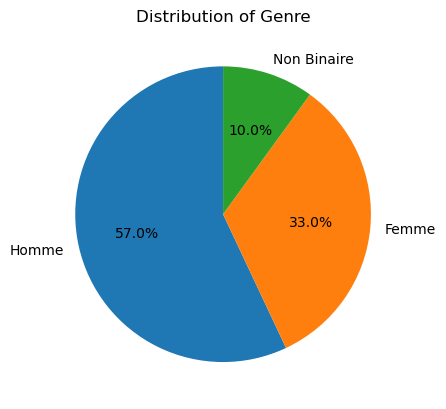

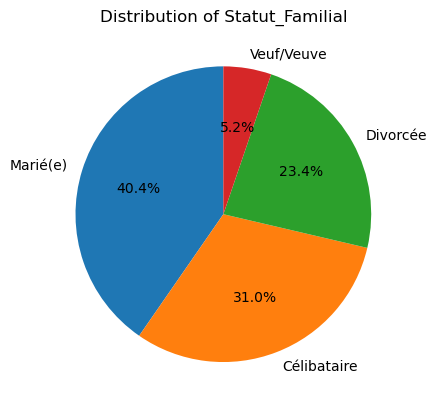

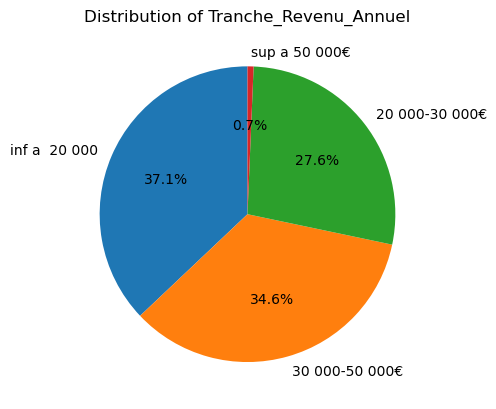

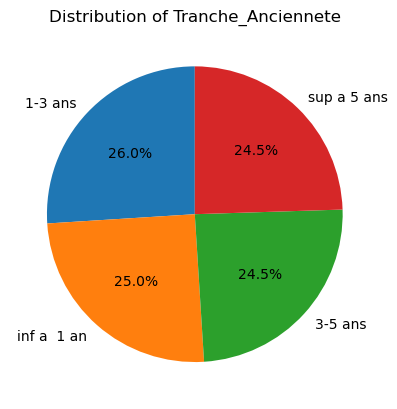

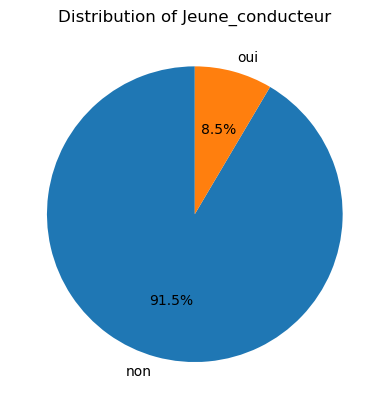

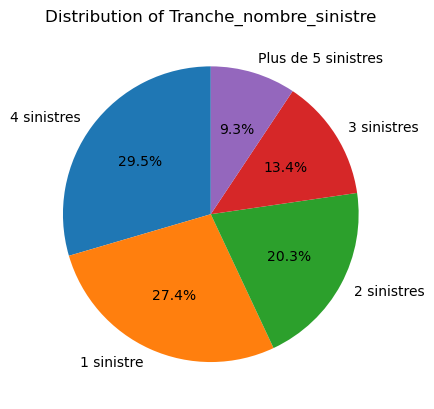

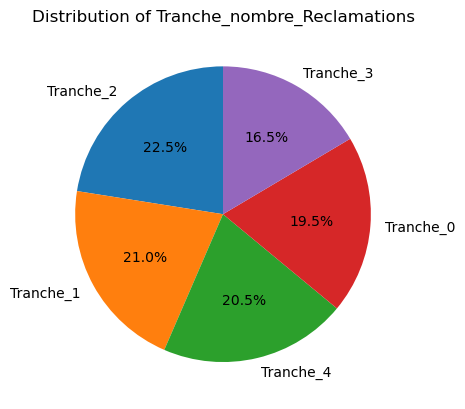

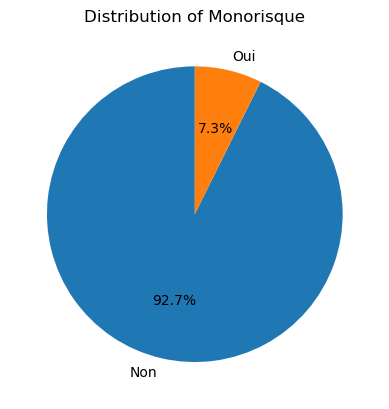

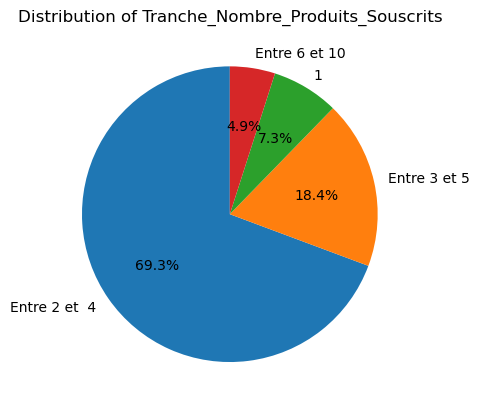

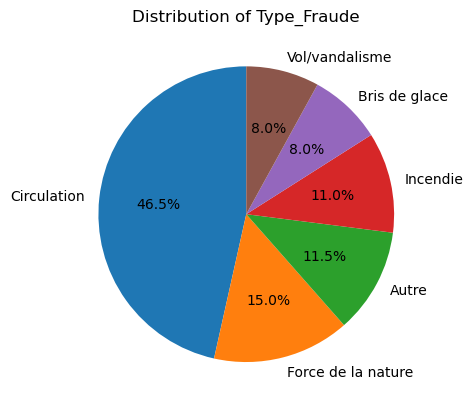

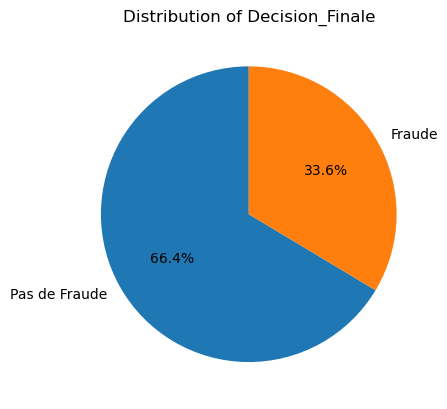

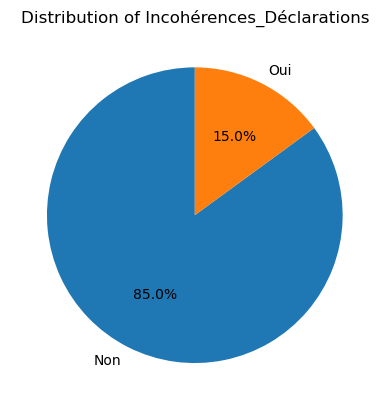

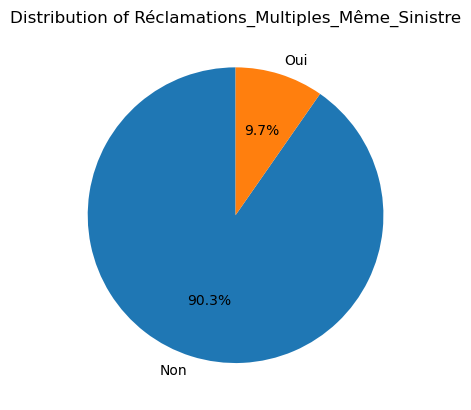

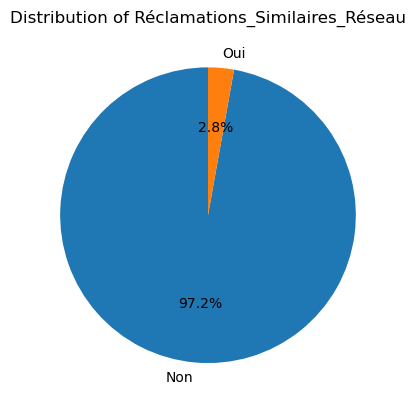

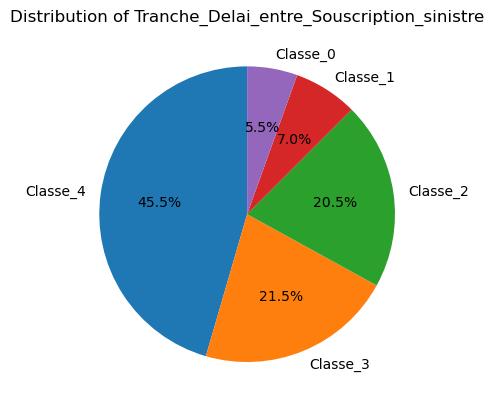

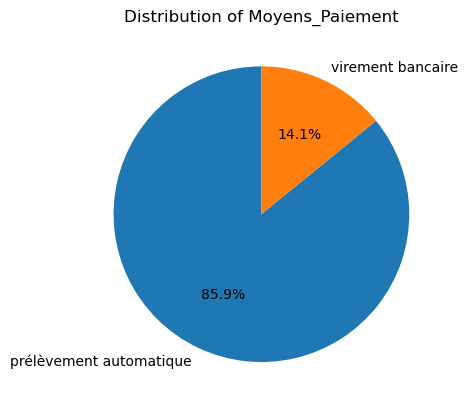

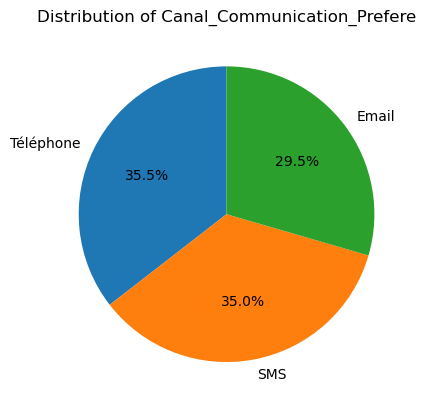

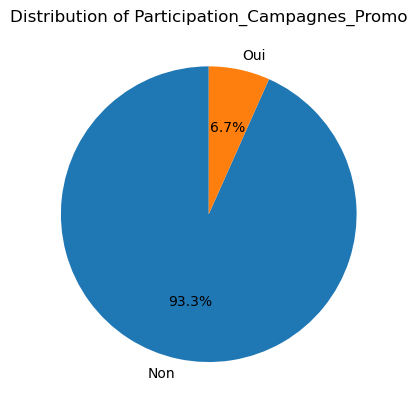

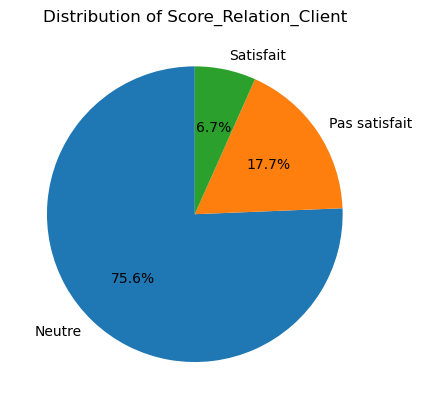

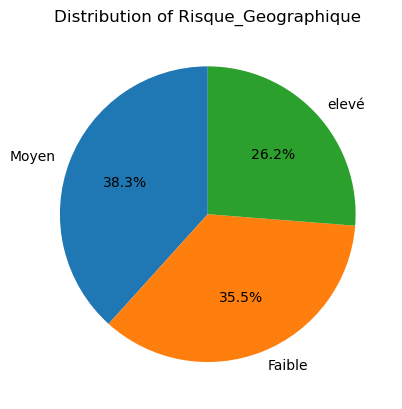

In [16]:
# Fonction pour créer un diagramme en camembert pour chaque colonne catégorielle
def plot_pie_charts(df):
    df = df.select_dtypes(include=['object'])
    for column in df.columns:
        fig, ax = plt.subplots()
        df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
        ax.set_ylabel('')  # enlever le label de l'axe y
        ax.set_title(f'Distribution of {column}')
        plt.show()
        
plot_pie_charts(df_graphiques)

/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/05/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19/02/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '22/12/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarn

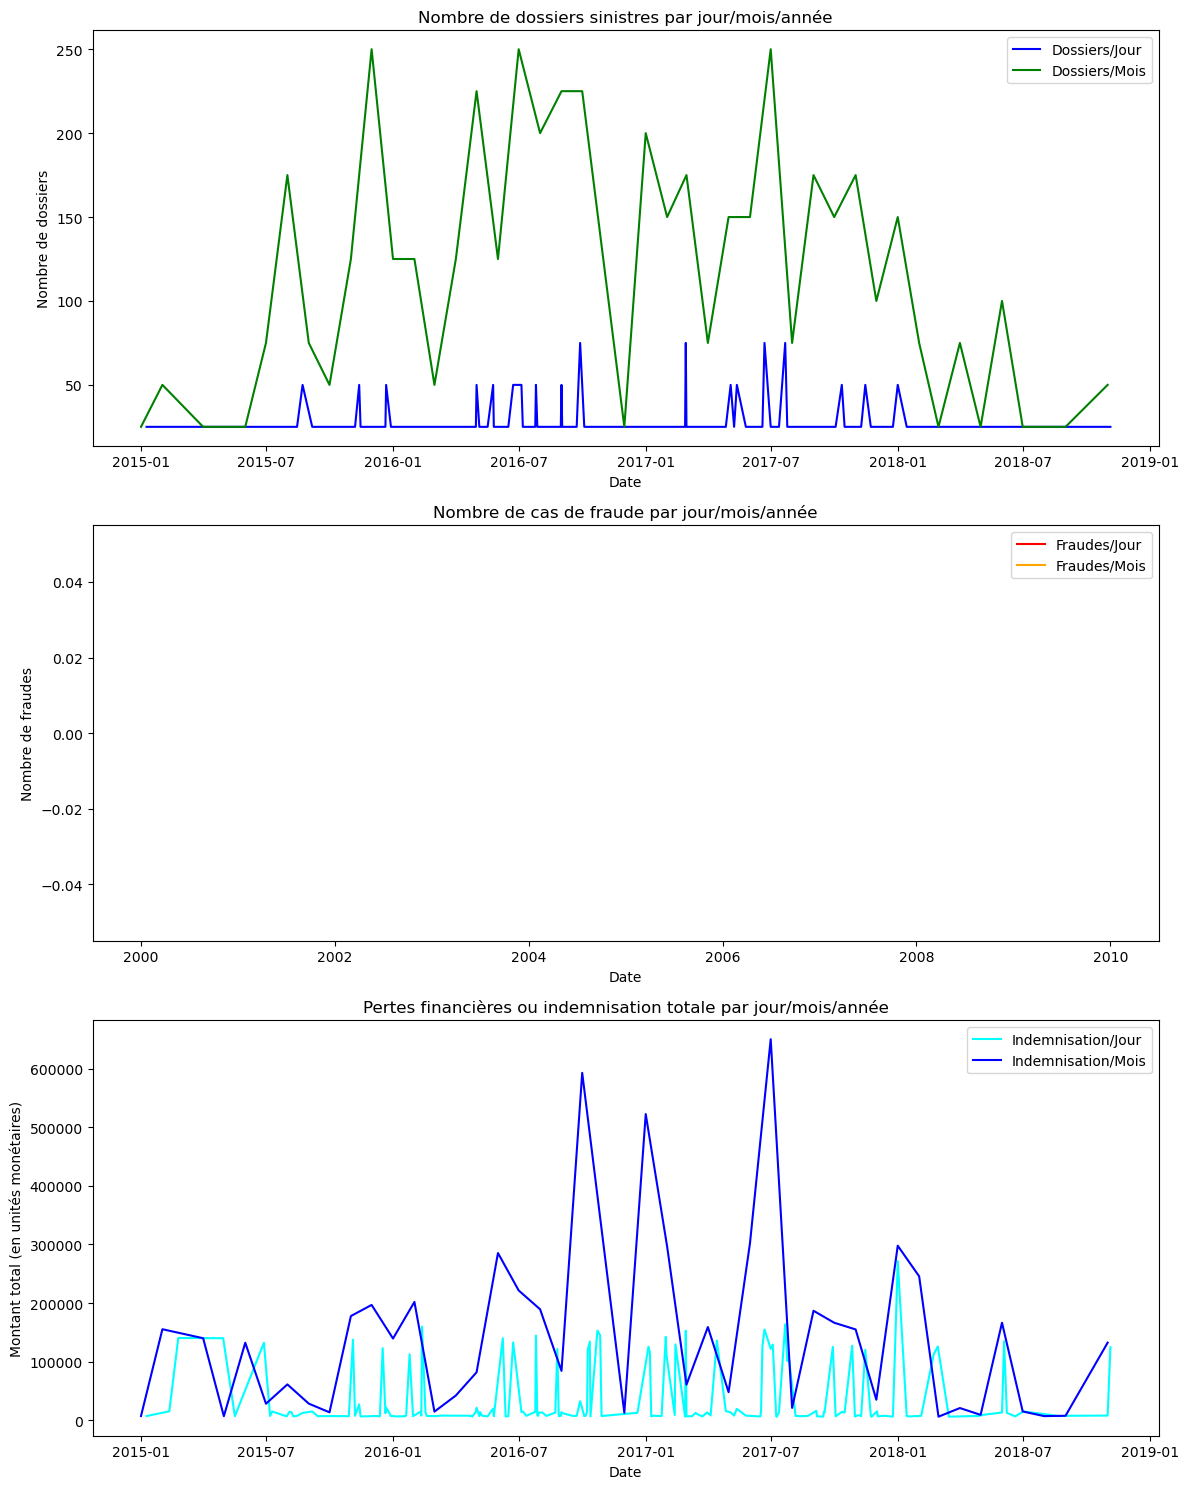

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Conversion de la colonne de date 'Date_Sinistre' en format datetime si nécessaire
df['Date_sinistre'] = pd.to_datetime(df['Date_sinistre'])  # Remplacer 'Date_Sinistre' par votre nom de colonne réel

# Création des colonnes pour l'analyse par jour, mois et année
df['jour'] = df['Date_sinistre'].dt.date
df['mois'] = df['Date_sinistre'].dt.to_period('M')

# 1. Nombre de dossiers sinistre par jour, mois, et année
dossiers_jour = df.groupby('jour')['Case ID'].count()
dossiers_mois = df.groupby('mois')['Case ID'].count()

# 2. Cas de fraude par jour, mois, et année
fraudes_jour = df[df['Decision_Finale'] == 'Fraude avérée'].groupby('jour')['Case ID'].count()
fraudes_mois = df[df['Decision_Finale'] == 'Fraude avérée'].groupby('mois')['Case ID'].count()

# 3. Pertes financières ou indemnisation totale par jour, mois, et année
indem_jour = df.groupby('jour')['Montant_reclame_par_client'].sum()
indem_mois = df.groupby('mois')['Montant_reclame_par_client'].sum()

# Création des graphiques pour chaque catégorie (jour, mois, année)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

# Nombre de dossiers sinistres par jour, mois, et année
axes[0].plot(dossiers_jour.index, dossiers_jour.values, label="Dossiers/Jour", color='blue')
axes[0].plot(dossiers_mois.index.to_timestamp(), dossiers_mois.values, label="Dossiers/Mois", color='green')
axes[0].set_title('Nombre de dossiers sinistres par jour/mois/année')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Nombre de dossiers')
axes[0].legend()

# Cas de fraude enregistrés par jour, mois, et année
axes[1].plot(fraudes_jour.index, fraudes_jour.values, label="Fraudes/Jour", color='red')
axes[1].plot(fraudes_mois.index.to_timestamp(), fraudes_mois.values, label="Fraudes/Mois", color='orange')
axes[1].set_title('Nombre de cas de fraude par jour/mois/année')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Nombre de fraudes')
axes[1].legend()

# Pertes financières ou indemnisation totale par jour, mois, et année
axes[2].plot(indem_jour.index, indem_jour.values, label="Indemnisation/Jour", color='cyan')
axes[2].plot(indem_mois.index.to_timestamp(), indem_mois.values, label="Indemnisation/Mois", color='blue')
axes[2].set_title('Pertes financières ou indemnisation totale par jour/mois/année')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Montant total (en unités monétaires)')
axes[2].legend()

plt.tight_layout()
plt.show()

## Pré traitement

#### Remplacer ou supprimer les valeurs manquantes

In [18]:
def impute_missing_values(df, strategy='median', fill_value=0, columns=None, remove_missing=False):
    if columns:
        data = df[columns]
    else:
        data = df
    
    if remove_missing:
        imputed_df = data.dropna()
    
    else:
        if strategy in ['zero', 'median', 'mean', 'most_frequent']:
            imputer = SimpleImputer(strategy=strategy, fill_value=fill_value)
        elif strategy == 'knn':
            imputer = KNNImputer()
        elif strategy == 'iterative':
            imputer = IterativeImputer()
        else:
            raise ValueError("Invalid strategy: choose from 'zero', 'median', 'mean', 'most_frequent', 'knn', 'iterative'")
        
        imputed_data = imputer.fit_transform(data)
        imputed_df = pd.DataFrame(imputed_data, columns=data.columns, index=df.index)
    
    if columns:
        df[columns] = imputed_df
    else:
        df = imputed_df
        
    return df


#### Supprimer les valeurs aberrantes

In [19]:
def sup_val_aberrantes(data, num_col=None, cat_col=None, threshold=1.5):
    
    ## Separation des colonnes catégorielle et numérique
    if num_col is None:
        num_col = data.select_dtypes(include=['float64', 'int64']).columns
    if cat_col is None:
        cat_col = []
    
    # identifications des indices des valeurs aberrantes pour une colonne
    Q1 = data[num_col].quantile(0.25)
    Q3 = data[num_col].quantile(0.75)
    IQR = Q3 - Q1
    born_inf = Q1 - threshold * IQR
    born_sup = Q3 + threshold * IQR
    
    # Combine outlier identification for numeric and categorical columns
    # Supprimer les lignes contenant des valeurs aberrantes dans au moins une colonne numérique ou catégorielle
    cleaned_data = data[~((data[num_col] < born_inf) | (data[num_col] > born_sup)).any(axis=1)]
    
    return cleaned_data


#### Encoder les variables categorielle 


In [20]:
def encode_categorical_variables(df, columns, method='onehot'):
    if method == 'onehot':
        encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
        encoded_data = encoder.fit_transform(df[columns])
        encoded_df = pd.DataFrame(encoded_data, 
                                  columns=encoder.get_feature_names_out(columns), 
                                  index=df.index)
    elif method == 'ordinal':
        encoder = OrdinalEncoder()
        encoded_data = encoder.fit_transform(df[columns])
        encoded_df = pd.DataFrame(encoded_data, 
                                  columns=columns,  
                                  index=df.index)
    else:
        raise ValueError("Invalid method: choose from 'onehot' or 'ordinal'")
    
    # Supprimer les colonnes d'origine
    df = df.drop(columns, axis=1)
    
    # Concaténer les nouvelles colonnes encodées
    df = pd.concat([df, encoded_df], axis=1)
    
    return df

#### Normalisation des données numériques


In [21]:
def scale_features(df, columns=None, scaler_type='standard'):
    if scaler_type not in ['standard', 'minmax']:
        raise ValueError("Invalid scaler_type: choose from 'standard' or 'minmax'")

    if columns is not None and len(columns) > 0:
        data = df[columns]
    else:
        data = df

    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaler_type: choose from 'standard' or 'minmax'")

    scaled_data = scaler.fit_transform(data)
    scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=df.index)

    if columns is not None and len(columns) > 0:
        df[columns] = scaled_df
    else:
        df = scaled_df

    return df

#### Fonction de séparation des prédicteurs et de la variable cible

In [22]:
def separate_features_and_target(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    return X, y

#### Préparation du jeu de données pour le modèle

In [23]:
df_traitement = df_graphiques.drop('Montant_Final_Recouvre', axis=1)
df_traitement

,Canal_Souscription,Type_Client,Tranche_Age,Genre,Statut_Familial,Tranche_Revenu_Annuel,Tranche_Anciennete,Jeune_conducteur,Tranche_nombre_sinistre,Tranche_nombre_Reclamations,Monorisque,Tranche_Nombre_Produits_Souscrits,Montant_Total_Souscrit,Type_Fraude,Montant_reclame_par_client,Decision_Finale,Temps_Investigation (jours),Incohérences_Déclarations,Réclamations_Multiples_Même_Sinistre,Réclamations_Similaires_Réseau,Tranche_Delai_entre_Souscription_sinistre,Moyens_Paiement,Historique_Paiements_En_Retard,Canal_Communication_Prefere,Participation_Campagnes_Promo,Score_Relation_Client,Risque_Geographique
0,En ligne,Entreprise,18-24,Femme,Marié(e),30 000-50 000€,3-5 ans,oui,3 sinistres,Tranche_0,Non,Entre 2 et 4,2885,Bris de glace,989,Fraude,3,Non,Non,Non,Classe_2,prélèvement automatique,0,SMS,Non,Neutre,Faible
1,Téléphone,Particulier,45-54,Homme,Marié(e),inf a 20 000,inf a 1 an,non,Plus de 5 sinistres,Tranche_0,Non,Entre 2 et 4,1385,Autre,298,Fraude,28,Oui,Oui,Non,Classe_4,prélèvement automatique,0,Email,Non,Neutre,elevé
2,Téléphone,Entreprise,65+,Femme,Marié(e),20 000-30 000€,inf a 1 an,non,3 sinistres,Tranche_4,Non,Entre 3 et 5,2604,Circulation,437,Pas de Fraude,28,Non,Non,Non,Classe_3,prélèvement automatique,0,Téléphone,Non,Neutre,Moyen
3,En ligne,TNS,25-34,Homme,Divorcée,30 000-50 000€,inf a 1 an,non,1 sinistre,Tranche_3,Non,Entre 2 et 4,2795,Force de la nature,665,Fraude,28,Non,Non,Non,Classe_2,prélèvement automatique,0,SMS,Non,Neutre,Faible
4,En ligne,Entreprise,65+,Homme,Marié(e),inf a 20 000,inf a 1 an,non,1 sinistre,Tranche_1,Non,Entre 2 et 4,2216,Force de la nature,591,Pas de Fraude,28,Oui,Non,Non,Classe_4,prélèvement automatique,0,SMS,Non,Neutre,Moyen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,En ligne,TNS,55-64,Homme,Célibataire,inf a 20 000,3-5 ans,non,1 sinistre,Tranche_0,Oui,1,517,Autre,430,Pas de Fraude,13,Non,Non,Non,Classe_2,prélèvement automatique,0,SMS,Non,Neutre,Faible
4996,Téléphone,Entreprise,35-44,Femme,Célibataire,inf a 20 000,sup a 5 ans,non,1 sinistre,Tranche_4,Non,Entre 2 et 4,2649,Circulation,293,Pas de Fraude,15,Non,Non,Non,Classe_2,prélèvement automatique,0,Email,Non,Pas satisfait,Faible
4997,Agence,TNS,18-24,Homme,Divorcée,inf a 20 000,inf a 1 an,non,1 sinistre,Tranche_0,Non,Entre 2 et 4,2675,Circulation,114,Pas de Fraude,10,Non,Non,Non,Classe_4,prélèvement automatique,0,Email,Non,Neutre,Faible
4998,Agence,TNS,65+,Femme,Célibataire,20 000-30 000€,1-3 ans,non,4 sinistres,Tranche_2,Non,Entre 2 et 4,1505,Autre,482,Pas de Fraude,24,Non,Non,Non,Classe_2,prélèvement automatique,0,Téléphone,Non,Neutre,Moyen


In [24]:
df_traitement.select_dtypes(include=['float64', 'int64']).columns

Index(['Montant_Total_Souscrit', 'Montant_reclame_par_client',
       'Temps_Investigation (jours)', 'Historique_Paiements_En_Retard'],
      dtype='object')

In [25]:
df_traitement.head()

,Canal_Souscription,Type_Client,Tranche_Age,Genre,Statut_Familial,Tranche_Revenu_Annuel,Tranche_Anciennete,Jeune_conducteur,Tranche_nombre_sinistre,Tranche_nombre_Reclamations,Monorisque,Tranche_Nombre_Produits_Souscrits,Montant_Total_Souscrit,Type_Fraude,Montant_reclame_par_client,Decision_Finale,Temps_Investigation (jours),Incohérences_Déclarations,Réclamations_Multiples_Même_Sinistre,Réclamations_Similaires_Réseau,Tranche_Delai_entre_Souscription_sinistre,Moyens_Paiement,Historique_Paiements_En_Retard,Canal_Communication_Prefere,Participation_Campagnes_Promo,Score_Relation_Client,Risque_Geographique
0,En ligne,Entreprise,18-24,Femme,Marié(e),30 000-50 000€,3-5 ans,oui,3 sinistres,Tranche_0,Non,Entre 2 et 4,2885,Bris de glace,989,Fraude,3,Non,Non,Non,Classe_2,prélèvement automatique,0,SMS,Non,Neutre,Faible
1,Téléphone,Particulier,45-54,Homme,Marié(e),inf a 20 000,inf a 1 an,non,Plus de 5 sinistres,Tranche_0,Non,Entre 2 et 4,1385,Autre,298,Fraude,28,Oui,Oui,Non,Classe_4,prélèvement automatique,0,Email,Non,Neutre,elevé
2,Téléphone,Entreprise,65+,Femme,Marié(e),20 000-30 000€,inf a 1 an,non,3 sinistres,Tranche_4,Non,Entre 3 et 5,2604,Circulation,437,Pas de Fraude,28,Non,Non,Non,Classe_3,prélèvement automatique,0,Téléphone,Non,Neutre,Moyen
3,En ligne,TNS,25-34,Homme,Divorcée,30 000-50 000€,inf a 1 an,non,1 sinistre,Tranche_3,Non,Entre 2 et 4,2795,Force de la nature,665,Fraude,28,Non,Non,Non,Classe_2,prélèvement automatique,0,SMS,Non,Neutre,Faible
4,En ligne,Entreprise,65+,Homme,Marié(e),inf a 20 000,inf a 1 an,non,1 sinistre,Tranche_1,Non,Entre 2 et 4,2216,Force de la nature,591,Pas de Fraude,28,Oui,Non,Non,Classe_4,prélèvement automatique,0,SMS,Non,Neutre,Moyen


In [26]:
# Imputer les valeurs manquantes
#df_traitement = impute_missing_values(df_traitement, remove_missing=True)

# Supprimer les valeurs aberrantes
#data_cleaned = sup_val_aberrantes(df_traitement)

## Encodage binaire
df_traitement = df_traitement.replace({'Oui': 1, 'Non': 0})
df_traitement = df_traitement.replace({'oui': 1, 'non': 0})

# Séparer les prédicteurs et la variable cible
df_traitement = df_traitement.replace({'Fraude': 1, 'Pas de Fraude': 0})
X, y = separate_features_and_target(df_traitement, 'Decision_Finale')

In [27]:
df_traitement.head()

,Canal_Souscription,Type_Client,Tranche_Age,Genre,Statut_Familial,Tranche_Revenu_Annuel,Tranche_Anciennete,Jeune_conducteur,Tranche_nombre_sinistre,Tranche_nombre_Reclamations,Monorisque,Tranche_Nombre_Produits_Souscrits,Montant_Total_Souscrit,Type_Fraude,Montant_reclame_par_client,Decision_Finale,Temps_Investigation (jours),Incohérences_Déclarations,Réclamations_Multiples_Même_Sinistre,Réclamations_Similaires_Réseau,Tranche_Delai_entre_Souscription_sinistre,Moyens_Paiement,Historique_Paiements_En_Retard,Canal_Communication_Prefere,Participation_Campagnes_Promo,Score_Relation_Client,Risque_Geographique
0,En ligne,Entreprise,18-24,Femme,Marié(e),30 000-50 000€,3-5 ans,1,3 sinistres,Tranche_0,0,Entre 2 et 4,2885,Bris de glace,989,1,3,0,0,0,Classe_2,prélèvement automatique,0,SMS,0,Neutre,Faible
1,Téléphone,Particulier,45-54,Homme,Marié(e),inf a 20 000,inf a 1 an,0,Plus de 5 sinistres,Tranche_0,0,Entre 2 et 4,1385,Autre,298,1,28,1,1,0,Classe_4,prélèvement automatique,0,Email,0,Neutre,elevé
2,Téléphone,Entreprise,65+,Femme,Marié(e),20 000-30 000€,inf a 1 an,0,3 sinistres,Tranche_4,0,Entre 3 et 5,2604,Circulation,437,0,28,0,0,0,Classe_3,prélèvement automatique,0,Téléphone,0,Neutre,Moyen
3,En ligne,TNS,25-34,Homme,Divorcée,30 000-50 000€,inf a 1 an,0,1 sinistre,Tranche_3,0,Entre 2 et 4,2795,Force de la nature,665,1,28,0,0,0,Classe_2,prélèvement automatique,0,SMS,0,Neutre,Faible
4,En ligne,Entreprise,65+,Homme,Marié(e),inf a 20 000,inf a 1 an,0,1 sinistre,Tranche_1,0,Entre 2 et 4,2216,Force de la nature,591,0,28,1,0,0,Classe_4,prélèvement automatique,0,SMS,0,Neutre,Moyen


In [28]:
X.head()

,Canal_Souscription,Type_Client,Tranche_Age,Genre,Statut_Familial,Tranche_Revenu_Annuel,Tranche_Anciennete,Jeune_conducteur,Tranche_nombre_sinistre,Tranche_nombre_Reclamations,Monorisque,Tranche_Nombre_Produits_Souscrits,Montant_Total_Souscrit,Type_Fraude,Montant_reclame_par_client,Temps_Investigation (jours),Incohérences_Déclarations,Réclamations_Multiples_Même_Sinistre,Réclamations_Similaires_Réseau,Tranche_Delai_entre_Souscription_sinistre,Moyens_Paiement,Historique_Paiements_En_Retard,Canal_Communication_Prefere,Participation_Campagnes_Promo,Score_Relation_Client,Risque_Geographique
0,En ligne,Entreprise,18-24,Femme,Marié(e),30 000-50 000€,3-5 ans,1,3 sinistres,Tranche_0,0,Entre 2 et 4,2885,Bris de glace,989,3,0,0,0,Classe_2,prélèvement automatique,0,SMS,0,Neutre,Faible
1,Téléphone,Particulier,45-54,Homme,Marié(e),inf a 20 000,inf a 1 an,0,Plus de 5 sinistres,Tranche_0,0,Entre 2 et 4,1385,Autre,298,28,1,1,0,Classe_4,prélèvement automatique,0,Email,0,Neutre,elevé
2,Téléphone,Entreprise,65+,Femme,Marié(e),20 000-30 000€,inf a 1 an,0,3 sinistres,Tranche_4,0,Entre 3 et 5,2604,Circulation,437,28,0,0,0,Classe_3,prélèvement automatique,0,Téléphone,0,Neutre,Moyen
3,En ligne,TNS,25-34,Homme,Divorcée,30 000-50 000€,inf a 1 an,0,1 sinistre,Tranche_3,0,Entre 2 et 4,2795,Force de la nature,665,28,0,0,0,Classe_2,prélèvement automatique,0,SMS,0,Neutre,Faible
4,En ligne,Entreprise,65+,Homme,Marié(e),inf a 20 000,inf a 1 an,0,1 sinistre,Tranche_1,0,Entre 2 et 4,2216,Force de la nature,591,28,1,0,0,Classe_4,prélèvement automatique,0,SMS,0,Neutre,Moyen


In [29]:
# Encoder les variables catégorielles
categorical_columns = ['Canal_Souscription', 'Type_Client', 'Tranche_Age', 'Genre','Statut_Familial','Tranche_nombre_Reclamations',
                       'Tranche_Revenu_Annuel', 'Tranche_Anciennete','Tranche_nombre_sinistre','Tranche_Nombre_Produits_Souscrits',
                       'Type_Fraude','Tranche_Delai_entre_Souscription_sinistre','Moyens_Paiement','Canal_Communication_Prefere']
X = encode_categorical_variables(X, columns=categorical_columns, method='onehot')

categorical_columns_ordinal = ['Score_Relation_Client','Risque_Geographique']
X = encode_categorical_variables(X, columns=categorical_columns_ordinal, method='ordinal')

# Normaliser les données
numerical_columns =['Montant_reclame_par_client','Montant_Total_Souscrit','Temps_Investigation (jours)']
X = scale_features(X, columns=numerical_columns, scaler_type='standard')

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [30]:
X_train.head()

,Jeune_conducteur,Monorisque,Montant_Total_Souscrit,Montant_reclame_par_client,Temps_Investigation (jours),Incohérences_Déclarations,Réclamations_Multiples_Même_Sinistre,Réclamations_Similaires_Réseau,Historique_Paiements_En_Retard,Participation_Campagnes_Promo,Canal_Souscription_Agence,Canal_Souscription_En ligne,Canal_Souscription_Téléphone,Type_Client_Agriculteur,Type_Client_Entreprise,Type_Client_Particulier,Type_Client_TNS,Tranche_Age_18-24,Tranche_Age_25-34,Tranche_Age_35-44,Tranche_Age_45-54,Tranche_Age_55-64,Tranche_Age_65+,Genre_Femme,Genre_Homme,Genre_Non Binaire,Statut_Familial_Célibataire,Statut_Familial_Divorcée,Statut_Familial_Marié(e),Statut_Familial_Veuf/Veuve,Tranche_nombre_Reclamations_Tranche_0,Tranche_nombre_Reclamations_Tranche_1,Tranche_nombre_Reclamations_Tranche_2,Tranche_nombre_Reclamations_Tranche_3,Tranche_nombre_Reclamations_Tranche_4,Tranche_Revenu_Annuel_20 000-30 000€,Tranche_Revenu_Annuel_30 000-50 000€,Tranche_Revenu_Annuel_inf a 20 000,Tranche_Revenu_Annuel_sup a 50 000€,Tranche_Anciennete_1-3 ans,Tranche_Anciennete_3-5 ans,Tranche_Anciennete_inf a 1 an,Tranche_Anciennete_sup a 5 ans,Tranche_nombre_sinistre_1 sinistre,Tranche_nombre_sinistre_2 sinistres,Tranche_nombre_sinistre_3 sinistres,Tranche_nombre_sinistre_4 sinistres,Tranche_nombre_sinistre_Plus de 5 sinistres,Tranche_Nombre_Produits_Souscrits_1,Tranche_Nombre_Produits_Souscrits_Entre 2 et 4,Tranche_Nombre_Produits_Souscrits_Entre 3 et 5,Tranche_Nombre_Produits_Souscrits_Entre 6 et 10,Type_Fraude_Autre,Type_Fraude_Bris de glace,Type_Fraude_Circulation,Type_Fraude_Force de la nature,Type_Fraude_Incendie,Type_Fraude_Vol/vandalisme,Tranche_Delai_entre_Souscription_sinistre_Classe_0,Tranche_Delai_entre_Souscription_sinistre_Classe_1,Tranche_Delai_entre_Souscription_sinistre_Classe_2,Tranche_Delai_entre_Souscription_sinistre_Classe_3,Tranche_Delai_entre_Souscription_sinistre_Classe_4,Moyens_Paiement_prélèvement automatique,Moyens_Paiement_virement bancaire,Canal_Communication_Prefere_Email,Canal_Communication_Prefere_SMS,Canal_Communication_Prefere_Téléphone,Score_Relation_Client,Risque_Geographique
4624,0,0,-0.042282,-0.330728,0.792506,0,0,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
849,0,0,-0.174984,-0.443665,1.146567,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1774,0,0,-0.303182,-0.400091,-0.151656,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1519,0,0,-0.195400,-0.366743,-0.623737,0,1,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1387,0,0,-0.367581,-0.387641,1.028547,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
X_train.dtypes

Jeune_conducteur                           int64
Monorisque                                 int64
Montant_Total_Souscrit                   float64
Montant_reclame_par_client               float64
Temps_Investigation (jours)              float64
                                          ...   
Canal_Communication_Prefere_Email        float64
Canal_Communication_Prefere_SMS          float64
Canal_Communication_Prefere_Téléphone    float64
Score_Relation_Client                    float64
Risque_Geographique                      float64
Length: 70, dtype: object

## MODELISATION ML

#### RANDOM FOREST

In [32]:
## Modèle de forêt aléatoire
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Define the parameter distribution with class_weight
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1, 20),
              'class_weight': ['balanced', None]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions=param_dist, 
                                 n_iter=50,  # Augmenter le nombre d'itérations pour une recherche plus exhaustive
                                 cv=5
                                )

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)
print("Meilleur score:", rand_search.best_score_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Calculer la précision sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur l'ensemble de test:", accuracy)

# Afficher un rapport détaillé
print("Rapport de classification:")
print(classification_report(y_test, y_pred))
  

Best hyperparameters: {'class_weight': None, 'max_depth': 3, 'n_estimators': 83}
Meilleur score: 0.6639999999999999


In [33]:
# Calcul de l'erreur quadratique moyenne (RMSE) sur l'ensemble de test
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE sur l'ensemble de test:", rmse)

RMSE sur l'ensemble de test: 0.5796550698475775


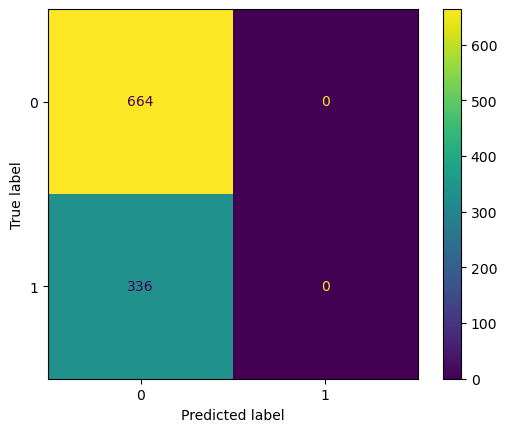

In [34]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [35]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.664
Precision: 0.0
Recall: 0.0


/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


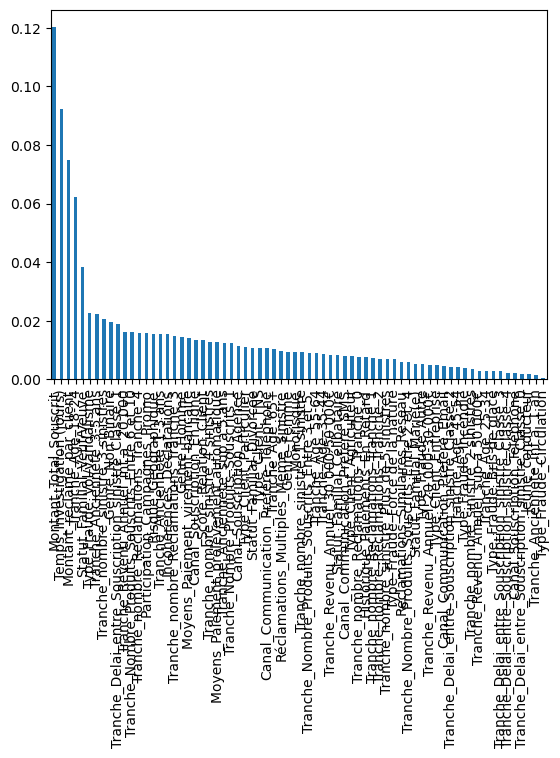

In [36]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

#### Bagging (Bootstrap Aggregating)
Le Bagging est une méthode où plusieurs modèles identiques sont entraînés sur différentes sous-ensembles de données (échantillonnés avec remplacement). Les prédictions des modèles sont ensuite combinées (souvent par vote majoritaire pour les tâches de classification).

In [53]:
from sklearn.ensemble import BaggingClassifier
#from sklearn.tree import DecisionTreeClassifier

# Créer un classifieur de base (arbre de décision)
base_model = RandomForestClassifier()

# Créer un classifieur Bagging
bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# Entraîner le modèle
bagging_model.fit(X_train, y_train)

# Prédire les labels
y_pred = bagging_model.predict(X_test)

# Évaluer les performances
print("Précision sur l'ensemble de test:", accuracy_score(y_test, y_pred))
print("Rapport de classification:")
print(classification_report(y_test, y_pred))


Précision sur l'ensemble de test: 0.648
Rapport de classification:
              precision    recall  f1-score   support

           0       0.66      0.97      0.78       664
           1       0.21      0.02      0.03       336

    accuracy                           0.65      1000
   macro avg       0.44      0.49      0.41      1000
weighted avg       0.51      0.65      0.53      1000



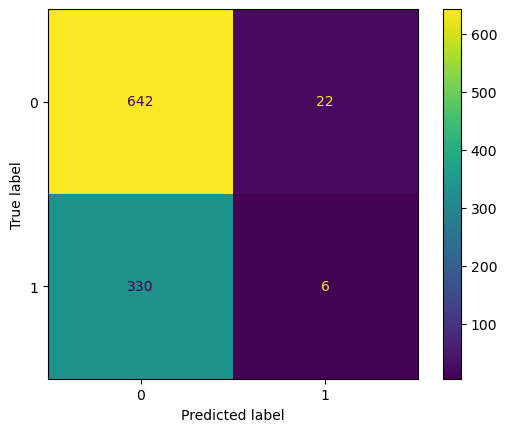

In [54]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [55]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.648
Precision: 0.21428571428571427
Recall: 0.017857142857142856


#### REGRESSION LOGISTIQUE

In [37]:
param_dist = {
    'C': uniform(0.001, 100),  # Paramètre de régularisation
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2', 'none']  # Pénalité de régularisation
}
# Créer un classifieur de régression logistique
log_reg = LogisticRegression()

# Utiliser la recherche aléatoire pour trouver les meilleurs hyperparamètres
rand_search = RandomizedSearchCV(
    log_reg, 
    param_distributions=param_dist, 
    n_iter=50,  # Augmenter le nombre d'itérations pour une recherche plus exhaustive
    cv=5, 
    verbose=2,  # Pour afficher les détails de l'ajustement
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# Ajuster l'objet de recherche aléatoire aux données
rand_search.fit(X_train, y_train)

# Créer une variable pour le meilleur modèle
best_log_reg = rand_search.best_estimator_

# Afficher les meilleurs hyperparamètres et le meilleur score
print('Meilleurs hyperparamètres:', rand_search.best_params_)
print("Meilleur score:", rand_search.best_score_)

# Générer des prédictions avec le meilleur modèle
y_pred = best_log_reg.predict(X_test)

# Calculer la précision sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur l'ensemble de test:", accuracy)

# Afficher un rapport détaillé
print("Rapport de classification:")
print(classification_report(y_test, y_pred))
  

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariegestel/o

/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariegestel/o

/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_m

Meilleurs hyperparamètres: {'C': 12.557240223660164, 'penalty': 'l2', 'solver': 'saga'}
Meilleur score: 0.662
RMSE sur l'ensemble de test: 0.5787918451395113


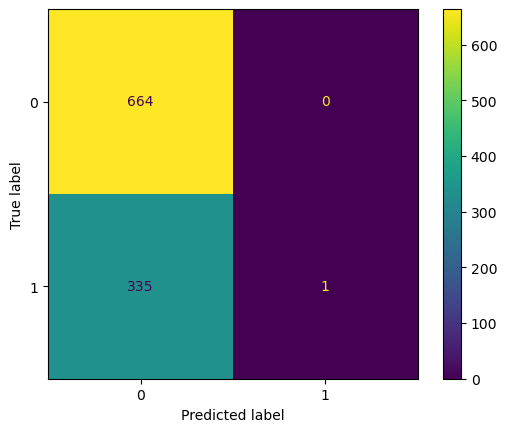

In [38]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [39]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.665
Precision: 1.0
Recall: 0.002976190476190476


In [56]:
# Créer un classifieur de base (arbre de décision)
base_model = LogisticRegression()

# Créer un classifieur Bagging
bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# Entraîner le modèle
bagging_model.fit(X_train, y_train)

# Prédire les labels
y_pred = bagging_model.predict(X_test)

# Évaluer les performances
print("Précision sur l'ensemble de test:", accuracy_score(y_test, y_pred))
print("Rapport de classification:")
print(classification_report(y_test, y_pred))


Précision sur l'ensemble de test: 0.665
Rapport de classification:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       664
           1       1.00      0.00      0.01       336

    accuracy                           0.67      1000
   macro avg       0.83      0.50      0.40      1000
weighted avg       0.78      0.67      0.53      1000



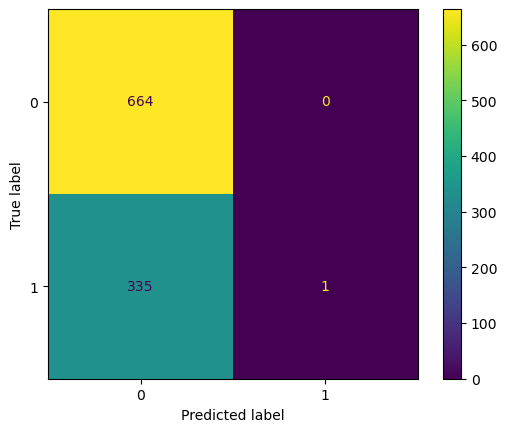

In [57]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#### XGBOOST

In [44]:
# Pipeline pour RandomForest et XGBoost avec Grid Sear
# Définir la distribution des paramètres pour la recherche aléatoire
# Définir la distribution des paramètres
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 15),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Créer un classifieur XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Utiliser la recherche aléatoire pour trouver les meilleurs hyperparamètres
rand_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions=param_dist, 
    n_iter=50,  # Augmenter le nombre d'itérations pour une recherche plus exhaustive
    cv=5, 
    verbose=2,  # Pour afficher les détails de l'ajustement
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# Ajuster l'objet de recherche aléatoire aux données
rand_search.fit(X_train, y_train)

# Créer une variable pour le meilleur modèle
best_xgb = rand_search.best_estimator_

# Afficher les meilleurs hyperparamètres et le meilleur score
print('Meilleurs hyperparamètres:', rand_search.best_params_)
print("Meilleur score:", rand_search.best_score_)

# Générer des prédictions avec le meilleur modèle
y_pred = best_xgb.predict(X_test)

# Calculer la précision sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur l'ensemble de test:", accuracy)

# Afficher un rapport détaillé
print("Rapport de classification:")
print(classification_report(y_test, y_pred))
  

/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Meilleurs hyperparamètres: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 312, 'subsample': 1.0}
Meilleur score: 0.6657499999999998
Précision sur l'ensemble de test: 0.661
Rapport de classification:
              precision    recall  f1-score   support

           0       0.66      0.99      0.80       664
           1       0.29      0.01      0.01       336

    accuracy                           0.66      1000
   macro avg       0.47      0.50      0.40      1000
weighted avg       0.54      0.66      0.53      1000



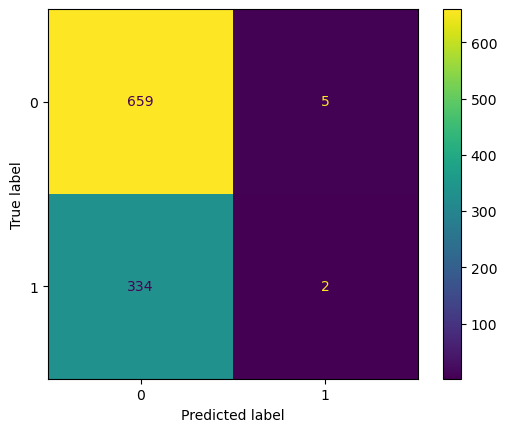

In [45]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [46]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.661
Precision: 0.2857142857142857
Recall: 0.005952380952380952


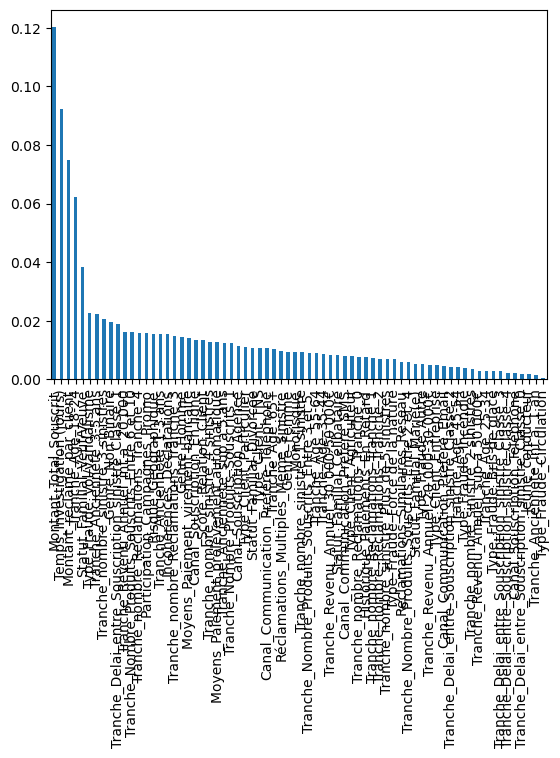

In [47]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [60]:
# Créer un classifieur XGBoost de base
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Créer un classifieur Bagging avec XGBoost comme modèle de base
bagging_model = BaggingClassifier(
    base_estimator=xgb_model,
    n_estimators=50,  # Nombre de modèles de base
    random_state=42,
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# Entraîner le modèle
bagging_model.fit(X_train, y_train)

# Prédire les labels
y_pred = bagging_model.predict(X_test)

# Évaluer les performances
print("Précision sur l'ensemble de test:", accuracy_score(y_test, y_pred))
print("Rapport de classification:")
print(classification_report(y_test, y_pred))

/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mariegestel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encod

Précision sur l'ensemble de test: 0.644
Rapport de classification:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       664
           1       0.40      0.12      0.18       336

    accuracy                           0.64      1000
   macro avg       0.54      0.51      0.48      1000
weighted avg       0.58      0.64      0.57      1000



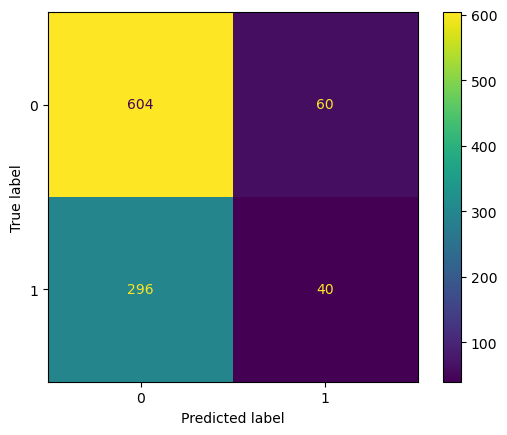

In [61]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### MODELISATION DL

#### MLP 

In [48]:
from sklearn.neural_network import MLPClassifier

# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créer et entraîner le modèle MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Générer des prédictions
y_pred = mlp_model.predict(X_test)

# Évaluer les performances
print("Précision sur l'ensemble de test:", accuracy_score(y_test, y_pred))
print("Rapport de classification:")
print(classification_report(y_test, y_pred))

Précision sur l'ensemble de test: 0.545
Rapport de classification:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       664
           1       0.31      0.30      0.31       336

    accuracy                           0.55      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.54      0.55      0.54      1000



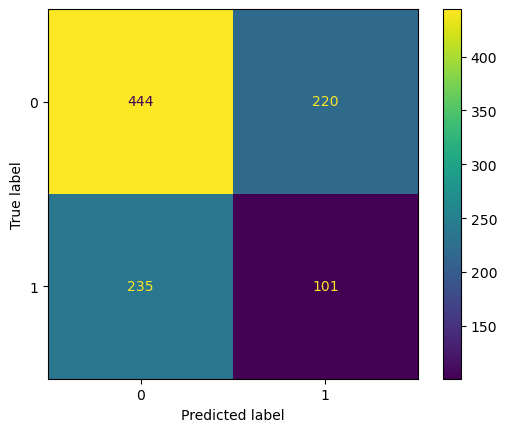

In [49]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [50]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.545
Precision: 0.3146417445482866
Recall: 0.3005952380952381
[CV] END C=86.74818178180988, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=59.74765046739774, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .....C=27.327654171270982, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=12.557240223660164, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=66.49591770523999, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=66.49591770523999, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=73.98059119129252, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .....C=64.67902193390913, penalty=none, solver=saga; total time=   0.3s
[CV] END ..C=26.75734377833357, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=12.800994512416201, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .......C=82.8055976581972, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=99.6756870659328, 

[CV] END C=86.74818178180988, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ...C=63.110132420761325, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=63.110132420761325, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=59.74765046739774, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END .....C=27.327654171270982, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....C=93.78136784804146, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=93.78136784804146, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .....C=11.053160704027036, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=11.053160704027036, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=64.67902193390913, penalty=none, solver=saga; total time=   0.2s
[CV] END .C=44.256995015220326, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ....C=51.797181341002656, penalty=none, solver=saga; total time=   0.2s
[CV] END C=12.80099451241620

[CV] END C=86.74818178180988, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..C=91.34464981272654, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ...C=63.110132420761325, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=59.74765046739774, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END .....C=27.327654171270982, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=12.557240223660164, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=73.98059119129252, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .C=44.256995015220326, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ....C=51.797181341002656, penalty=none, solver=saga; total time=   0.3s
[CV] END .......C=82.8055976581972, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=79.38693069565777, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=79.38693069565777, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=79.38693069565777

[CV] END ..C=91.34464981272654, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END ....C=93.78136784804146, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .....C=11.053160704027036, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=11.053160704027036, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=64.67902193390913, penalty=none, solver=saga; total time=   0.3s
[CV] END ..C=26.75734377833357, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=90.16184676886029, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=90.16184676886029, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=12.800994512416201, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=12.800994512416201, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ......C=99.6756870659328, penalty=none, solver=saga; total time=   0.2s
[CV] END ....C=21.262571919371304, penalty=none, solver=saga; total time=   0.2s
[CV] END ....C=21.26257191

[CV] END C=86.74818178180988, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ...C=63.110132420761325, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=59.74765046739774, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .....C=27.327654171270982, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=12.557240223660164, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=66.49591770523999, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=66.49591770523999, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=73.98059119129252, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .....C=64.67902193390913, penalty=none, solver=saga; total time=   0.2s
[CV] END ..C=26.75734377833357, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=90.16184676886029, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=90.16184676886029, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=90.16184676886029

[CV] END ..C=91.34464981272654, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END ......C=12.557240223660164, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=66.49591770523999, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=73.98059119129252, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .C=44.256995015220326, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END .C=44.256995015220326, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ....C=51.797181341002656, penalty=none, solver=saga; total time=   0.3s
[CV] END .......C=82.8055976581972, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ..C=92.93886222977258, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=89.02854322812415, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=89.02854322812415, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=89.02854322812415, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=89.02854322812415